In [1]:
# This notebook is to create an initial benchmark for software only solutions, using demo imaging scripts/tests
# I have made before.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

# Application: Remote Sensing

## NDVI - Normalized Difference Vegetation Index

https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index

This is a common graphical indicator used for remote sensing applications, typically from satellite imagery. The algorithm, although simplified in this form can be used to determine the amount of live vegetation in the image. 

This example can be thought of as a simple image operation in which a mathematical expression is used to generate a result. The equation is:

# NDVI = (NIR - Red)/(NIR + Red)


This results in a value ranging from 0.0 (No vegetation, eg. soil) to 1.0 (Densest vegetation).

The following cells evaluate this algorithm's speed on the ARM processor:
1. Read both images, Near Infrared and RGB
2. Calculate NDVI
3. Return the calculation's time


In [2]:
start = time.time()  # timer

# reading the images
nir = mpimg.imread('images/nir.png')
red = mpimg.imread('images/rgb.png')[:,:,0]

# calculate NDVI value
bottom = (nir.astype(float)+red.astype(float))
bottom[bottom == 0] = 0.01  # Make sure we don't divide by zero!
ndvi = (nir.astype(float)-red)/bottom

end = time.time()

result = end-start

print('Total calculation time: {:.2f} seconds'.format(result))


min = 0.
max = 1.0

Total calculation time: 0.46 seconds


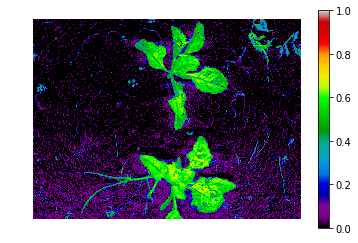

In [3]:
# visualization

plt.figure()
# plt.hist(ndvi.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
# plt.show()
plt.imshow(ndvi, cmap='nipy_spectral')
plt.clim(0.0,1.0)
plt.axis('off')
plt.colorbar()

plt.savefig('ndvi.png') # has to come before plt.show()
plt.show()

# Application: Video Output from USB Webcam

Here we demonstrate the ability to utilize a COTS USB webcam to perform real-time processing.

The following cell will showcase:
1. Loading the overlay for HDMI output. 
2. Opening the video feed using the USB port. 
3. Displaying the video on the HDMI monitor.
4. Recording the framerate.

In [4]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

In [5]:
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
hdmi_out = base.video.hdmi_out
hdmi_out.configure(Mode,PIXEL_BGR)
hdmi_out.start()

Frequency: 75600000


In [6]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

In [7]:
# initialize camera from OpenCV

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(videoIn.isOpened()))

Capture device is open: True


In [10]:
numFrames = 200 # used to calculate the FPS
fps = 0 # placehold
fpsData = []

try:
    while True:
        start = time.time() # start the timer

        for i in range(numFrames):
            ret, frame_vga = videoIn.read()
            # Display webcam image via HDMI Out
            if (ret):      
                outframe = hdmi_out.newframe()
                outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
                cv2.putText(outframe, '{:.2f}'.format(fps), (0,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255)) # FPS on the frame
                hdmi_out.writeframe(outframe)
            else:
                raise RuntimeError("Failed to read from camera.")

        end = time.time()
        fps = numFrames/(end-start)
        fpsData.append(fps)
        print('Frames per second: {}'.format(fps))
except KeyboardInterrupt:
    print('Demo stopped')
    print('Average FPS: {}'.format(np.mean(fpsData)))

Frames per second: 60.155068066463805
Frames per second: 60.02759151308014
Demo stopped
Average FPS: 60.091329789771976


# Application: Video Processing

Using the previous example, we then use processing methods which are the foundations for state-of-the-art techniques like neural networks. Common examples include:

* Canny Edge Detection
* Thresholding 
* Gaussian Blurring
* Color shift

In [9]:
numFrames = 200 # used to calculate the FPS
fps = 0 # placehold
fpsData = []

try:
    while True:
        start = time.time() # start the timer

        for i in range(numFrames):
            ret, frame_vga = videoIn.read()
            # Display webcam image via HDMI Out
            if (ret):      
                outframe = hdmi_out.newframe()
                laplacian_frame = cv2.Laplacian(frame_vga, cv2.CV_8U, dst=outframe)
                cv2.putText(outframe, 'Edge Detection {:.2f}'.format(fps), (0,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255)) # FPS on the frame
                hdmi_out.writeframe(outframe)
            else:
                raise RuntimeError("Failed to read from camera.")
                readError += 1

        end = time.time()
        fps = numFrames/(end-start)
        fpsData.append(fps)

        print('Frames per second: {}'.format(fps))
except KeyboardInterrupt:
    print('Demo stopped')
    print('Average FPS: {}'.format(np.mean(fpsData)))

Frames per second: 20.125471347657243
Frames per second: 20.191156048127144
Frames per second: 20.21338905026005
Frames per second: 20.22974238103836
Frames per second: 20.241281364593952
Frames per second: 20.32671887292103
Frames per second: 20.30170778521324
Frames per second: 20.304176047005843
Frames per second: 20.32100401933311
Frames per second: 20.30678156676816
Frames per second: 20.282391276321796
Frames per second: 20.29457025563886
Frames per second: 20.20541745345985
Frames per second: 20.176200894216183
Frames per second: 20.18796550428063
Frames per second: 20.1981689717308
Frames per second: 20.19638234084867
Frames per second: 20.207212984847928
Frames per second: 20.2141177281952
Frames per second: 20.248981173264234
Frames per second: 20.323322859876388
Frames per second: 20.32770450041126
Frames per second: 20.238340576355235
Frames per second: 20.229015990953645
Frames per second: 20.243632851905392
Frames per second: 20.25334743914887
Frames per second: 20.246863

In [11]:
#videoIn.release()
hdmi_out.stop()
#del hdmi_out